## ANN
**ANN** 은 딥러닝에서 사용하는 인공신경망(Artificial Neural Network)이다.  
**대표적인 예**와 그에 **해당하는 이론에 대한 내용**은 아래 링크를 참조하자.  

1. <a href="https://wjddyd66.github.io/dl/2019/07/26/Perceptron.html">Perceptron</a>
2. <a href="https://wjddyd66.github.io/dl/2019/07/26/NeuralNetwork-(1)-Basic-&-Activation-Function.html">MLP(NeuralNetwork)</a>


라이브러리 import

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

데이터 개수와 반복횟수 설정

In [2]:
num_data = 1000
num_epoch = 10000

input data, output data선언  
이전 Post와 마찬가지로 균등분포와 표준정규 분포로서 input, noise선언  
Target Data를 위한 식
$$y = x^2 +3$$


In [3]:
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
y = x**2 + 3
y_noise = y + noise

Model 선언  


**nn.Sequential**  
<code>torch.nn.Sequential(* args)</code>  
하나의 Container로서 Module을 서로 연결시켜주는 역할을 한다.  
하나의 ordered dict of moduls라고 생각해도 된다.  
여기서의 Model은 nn.Sequential을 통하여 nn.Linear와 nn.ReLU를 각 3개씩 연결하였다.  


**nn.ReLu**  
<code>torch.nn.ReLU(inplace=False)</code>  
$$ReLU(x) = max(0,x)$$

In [4]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1),
)

- Loss Function: L1Loss
- Optimizer: SGD

In [5]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.002)

loss_array List 선언: 나중에 matplotlib을 통하여 loss를 찍어보기 위한 변수

In [6]:
loss_array = []

Model Trainning

In [7]:
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

결과를 위하여 시각화

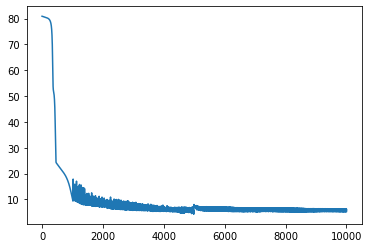

In [8]:
plt.plot(loss_array)
plt.show()

학습 결과와 실제 Model 비교

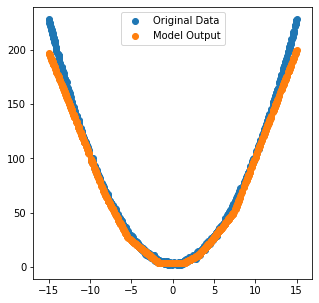

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x,y_noise,label="Original Data")
plt.scatter(x,output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()